# Продажи видео игр

## Формулировка задачи

**Мы попытаемся найти зависимости продаж между регионами.**

Для этого нужно сравнить различные комбинации продаж в регионах и найти наиболее коррелируемые. После этого попробовать различные модели и при необходимости выполнить их настройку. 

## Описание и визуализация данных

**Для начала импортируем данные и выполним первичный анализ.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns
sns.set_style('dark')

df = pd.read_csv('vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

**Датасет содержит список игр с продажами более 100 000 копий. Данные взяты с сайта vgchartz.com.**


 * Rank - Ranking of overall sales

 * Name - название игры

 * Platform - платформа (т.е. PC,PS4, итд.)

 * Year - год выпуска

 * Genre - жанр

 * Publisher - издатель

 * NA_Sales - продажи в Северной Америке (в миллионах)

 * EU_Sales - продажи в Европе (в миллионах)

 * JP_Sales - продажи в Японии (в миллионах)

 * Other_Sales - продажи в остальных странах (в миллионах)

 * Global_Sales - суммарная продажа со всех стран


**Посмотрим информацию о фичах.**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

Данные довольно полные, это избавляет нас от надобности чистить их.

**Выведем количество игр относительно платформ**

In [4]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**Выведем количество игр относительно жанров**

In [5]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

**Для улучшения анализа и визуализации избавимся от игр с издателями, которые опубликовали менее 50 игр и платформ с менее чем 90 играми. Издатели с менее чем 50 играми и платформы с меньше чем 90 играми будут переименованы в "Other".**

In [6]:
for i in df['Publisher'].unique():
    if df['Publisher'][df['Publisher'] == i].count() < 50:
        df['Publisher'][df['Publisher'] == i] = 'Other'
        
for i in df['Platform'].unique():
    if df['Platform'][df['Platform'] == i].count() < 90:
        df['Platform'][df['Platform'] == i] = 'Other'

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


**Посмотрим что поменялось**

In [7]:
df['Publisher'].value_counts()

Other                                     3342
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Microsoft Gam

In [8]:
df['Platform'].value_counts()

DS       2163
PS2      2161
PS3      1329
Wii      1325
X360     1265
PSP      1213
PS       1196
PC        960
XB        824
GBA       822
GC        556
3DS       509
PSV       413
PS4       336
N64       319
SNES      239
XOne      213
SAT       173
WiiU      143
2600      133
Other     110
GB         98
NES        98
Name: Platform, dtype: int64

**Теперь после очистки построим графики**

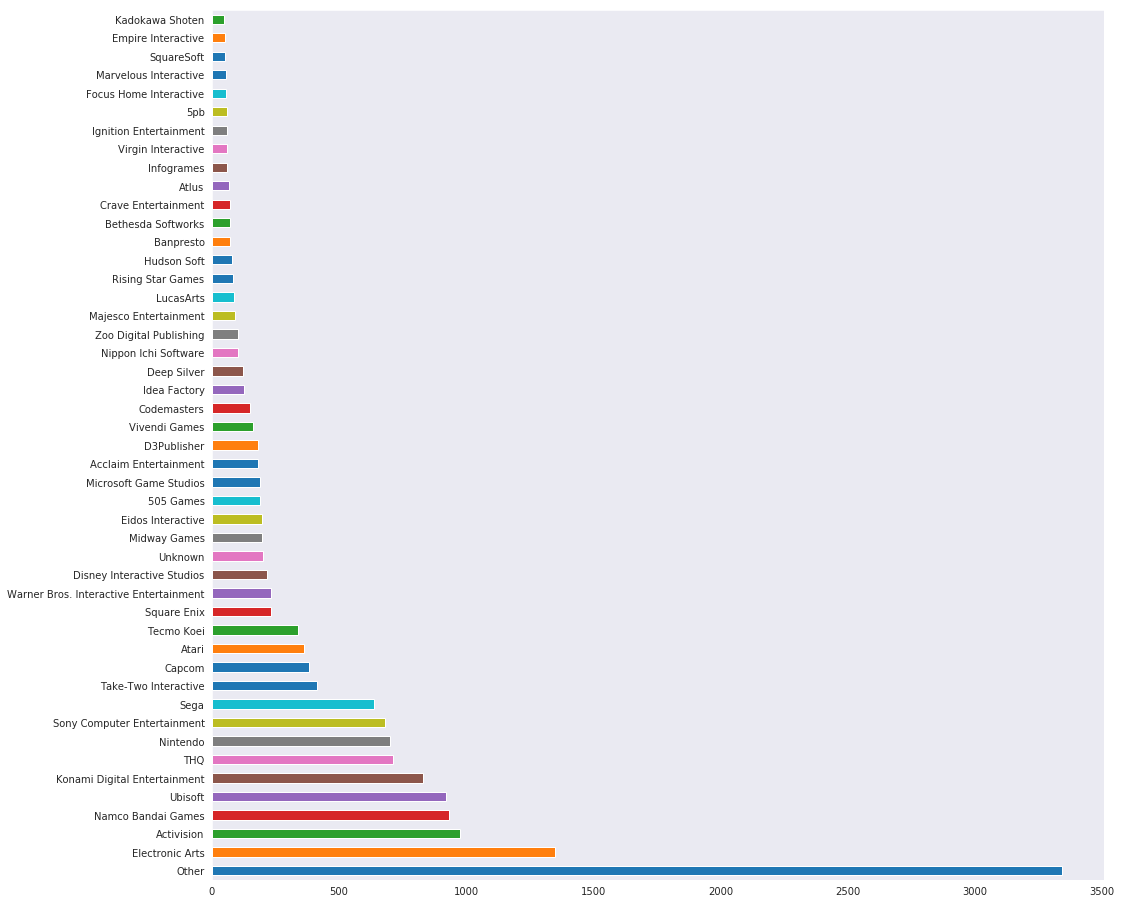

In [9]:
df['Publisher'].value_counts(sort=True).plot(kind='barh',figsize=(16,16))

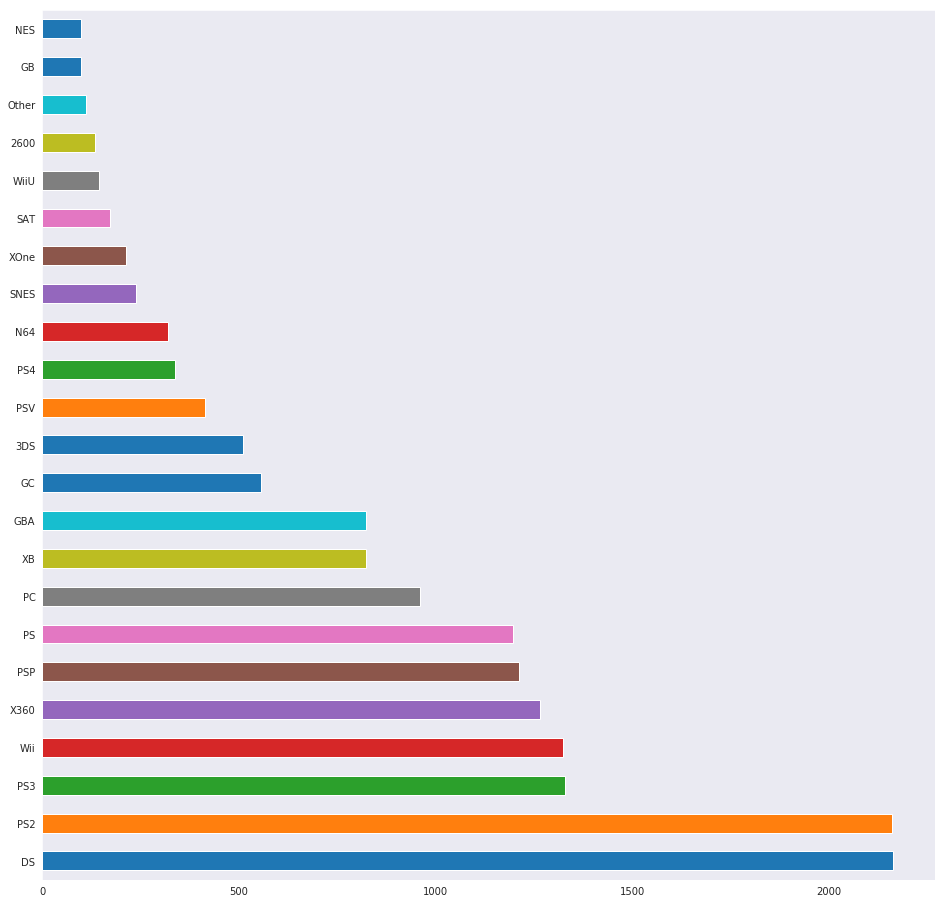

In [62]:
df['Platform'].value_counts(sort=True).plot(kind='barh',figsize=(16,16))

**Построим график по жанрам**

/usr/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


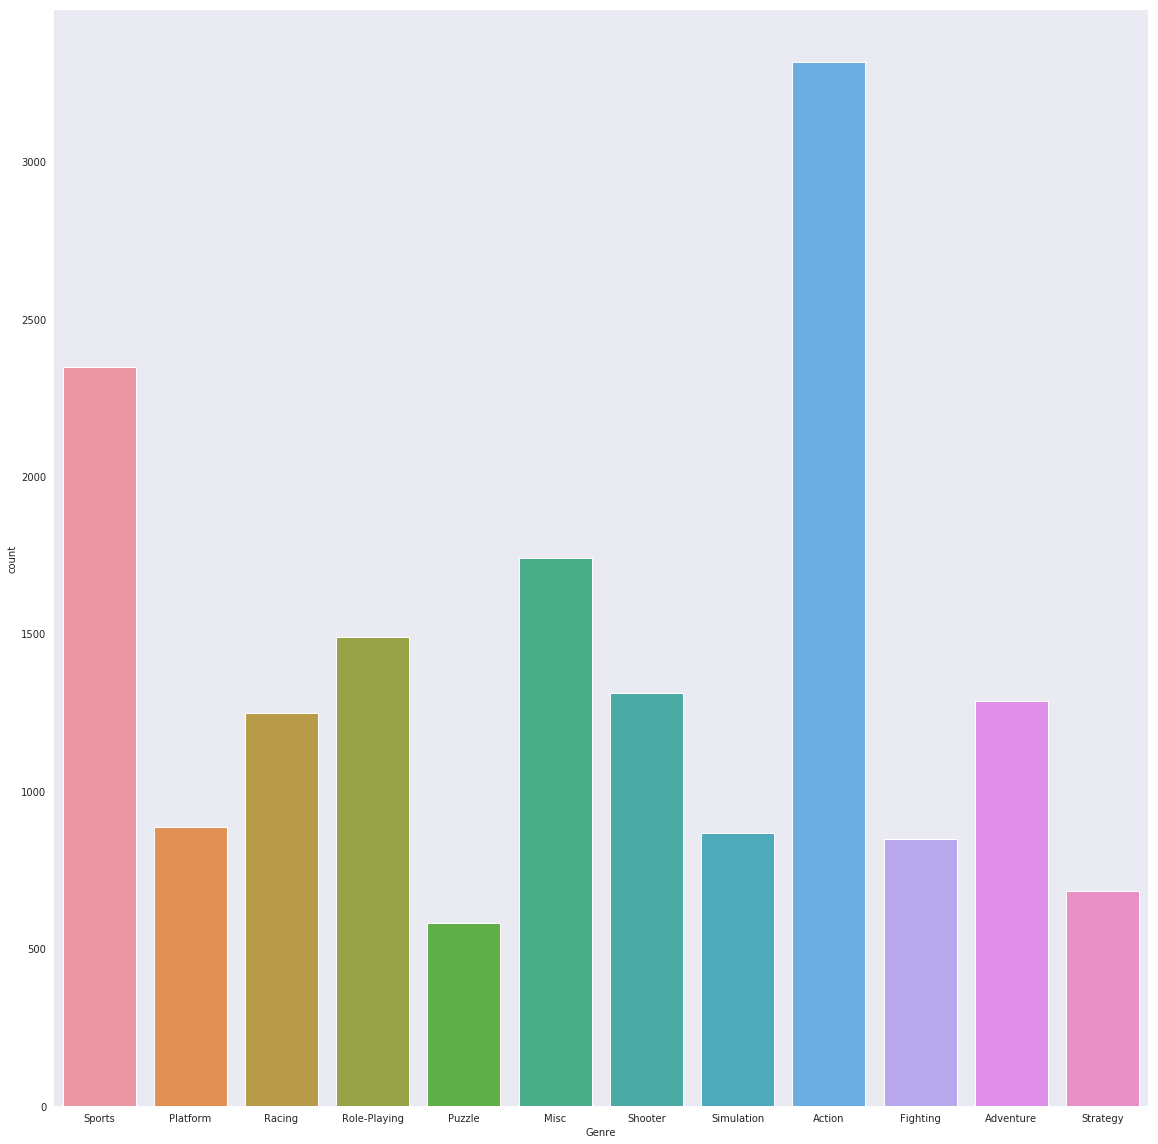

In [61]:
sns.factorplot('Genre',data=df,kind='count',size=16)

**Выведем количество игр имеющих более 1 миллиона копий, проданных в Свереной Америке и сгруппируем их по платформам**

In [12]:
df.index.name = 'Index'

In [13]:
platform_name = []
platform_frequency = []
for i in df['Platform'].unique():
    platform_name.append(i)
    platform_frequency.append(df['Name'][df['NA_Sales'] > 1.0][df['Platform'] == i].count())
plat = pd.DataFrame()
plat["Name"] = platform_name
plat["Frequency"] = platform_frequency
plat

Name  Frequency
0     Wii         81
1     NES         20
2      GB         21
3      DS         54
4    X360        130
5     PS3         84
6     PS2        146
7    SNES         19
8     GBA         30
9     3DS         13
10    PS4         27
11    N64         35
12     PS         87
13     XB         22
14     PC         31
15   2600         24
16    PSP         10
17   XOne         22
18     GC         19
19   WiiU          8
20  Other         12
21    PSV          0
22    SAT          0

**С помощью полученного выше датафрейма можем построить круговую диаграмму.**

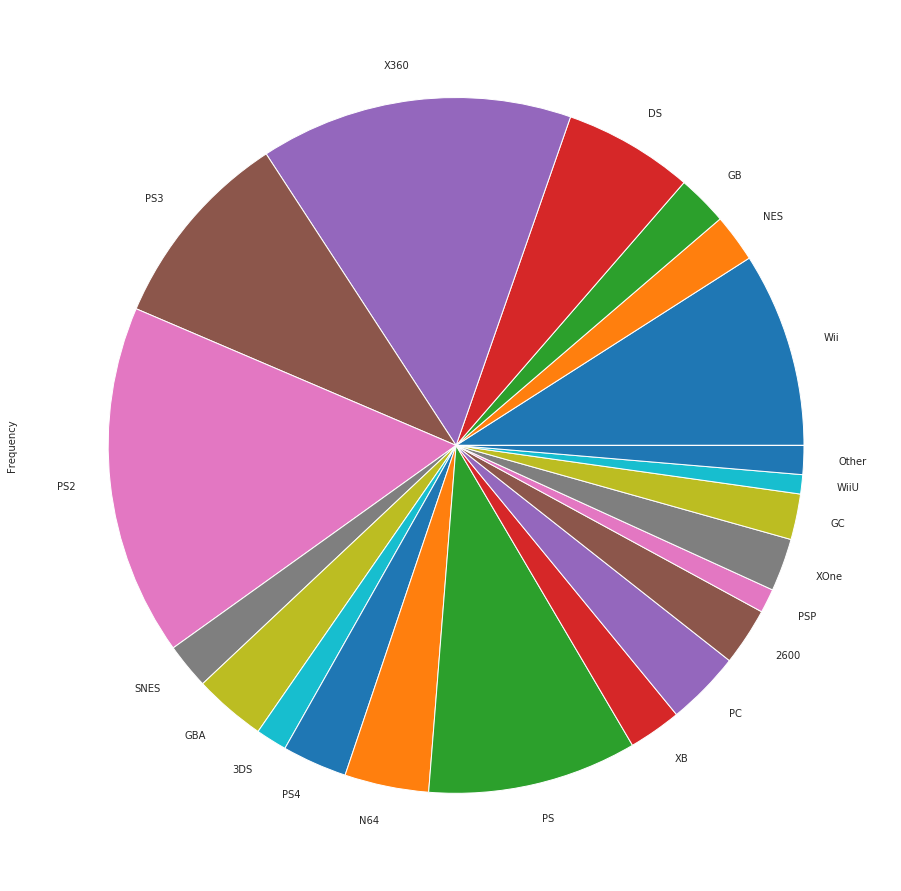

In [14]:
plat.plot(kind='pie',y='Frequency',labels=plat['Name'],legend=False,figsize=(16,16))

**Посмотрим корелляцию между регионами**

In [15]:
corr_1 = []
corr_2 = []
corr_res = []
sales_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
for i in sales_list:
    for j in sales_list:
        corr_1.append(i)
        corr_2.append(j)
        corr_res.append(df[i].corr(df[j]))
corr_data = pd.DataFrame(
    {'Corr_1': corr_1,
     'Corr_2': corr_2,
     'Correlation': corr_res
    })
corr_data = corr_data.pivot(values='Correlation',index='Corr_1',columns='Corr_2')

corr_data

Corr_2        EU_Sales  Global_Sales  JP_Sales  NA_Sales  Other_Sales
Corr_1                                                               
EU_Sales      1.000000      0.902836  0.435584  0.767727     0.726385
Global_Sales  0.902836      1.000000  0.611816  0.941047     0.748331
JP_Sales      0.435584      0.611816  1.000000  0.449787     0.290186
NA_Sales      0.767727      0.941047  0.449787  1.000000     0.634737
Other_Sales   0.726385      0.748331  0.290186  0.634737     1.000000

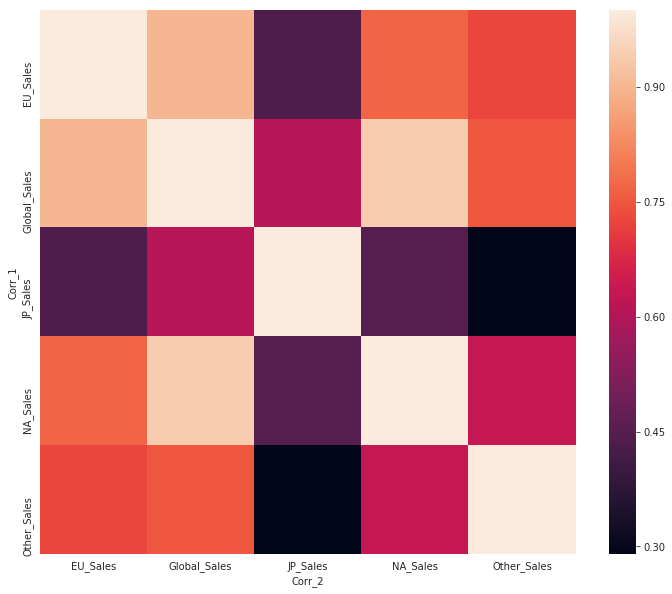

In [16]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_data)

**Заметим высокую корреляцию продаж в Северной Америке и глобальные продажи.**

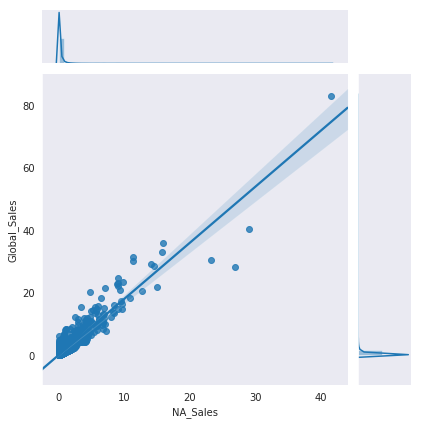

In [65]:
sns.jointplot(x="NA_Sales", y="Global_Sales", data=df, kind='reg')

## Построение моделей

Попробуем построить модель которая будет предсказывать глобальные продажи основываясь на прадажах в Северной Америке.

### Простая линейная регрессия

Подготовим данные, разделив на тренеровачный и тестовый датасет.

In [20]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 6].values
y = df.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/10, random_state = 0)


X_train = X_train.reshape((X_train.shape[0],1))
y_train = y_train.reshape((y_train.shape[0],1))
X_test = X_test.reshape((X_test.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))

Импортируем регрессор из библиотеки sklearn. Обучимся на тестовой выборке.

In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_test, y_test)

y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

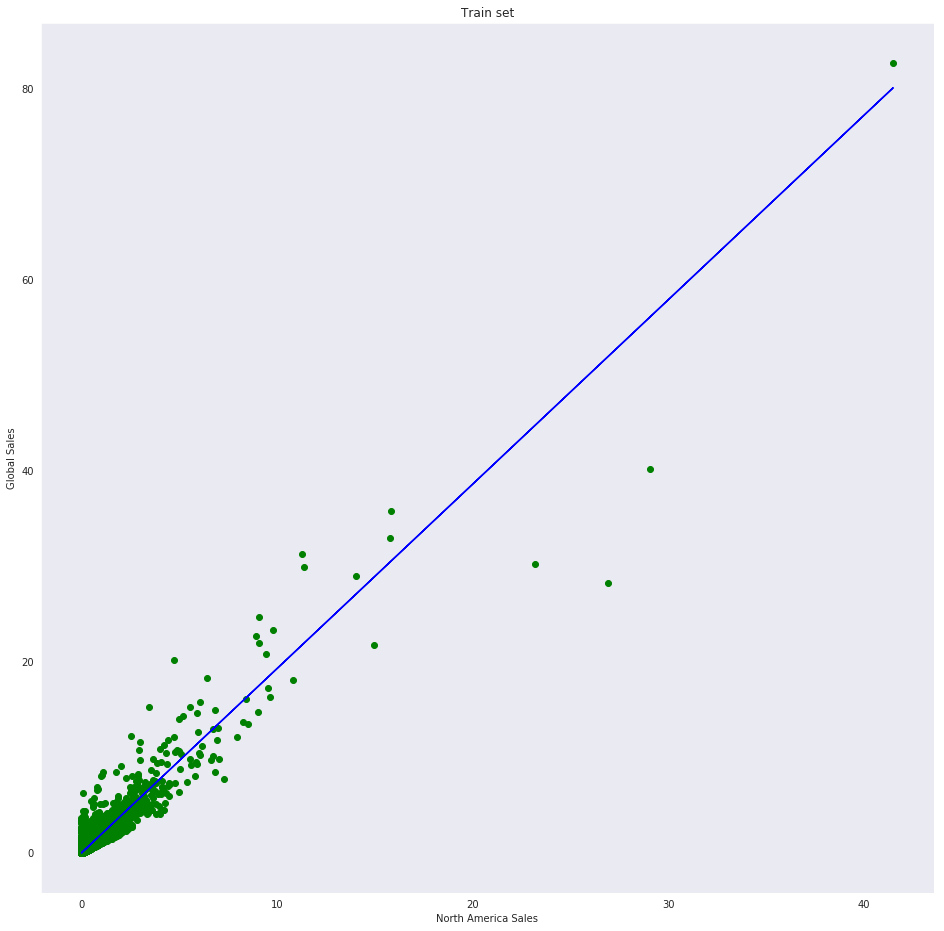

In [22]:
plt.figure(figsize = (16,16))
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_pred_train, color='blue')
plt.title('Train set')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

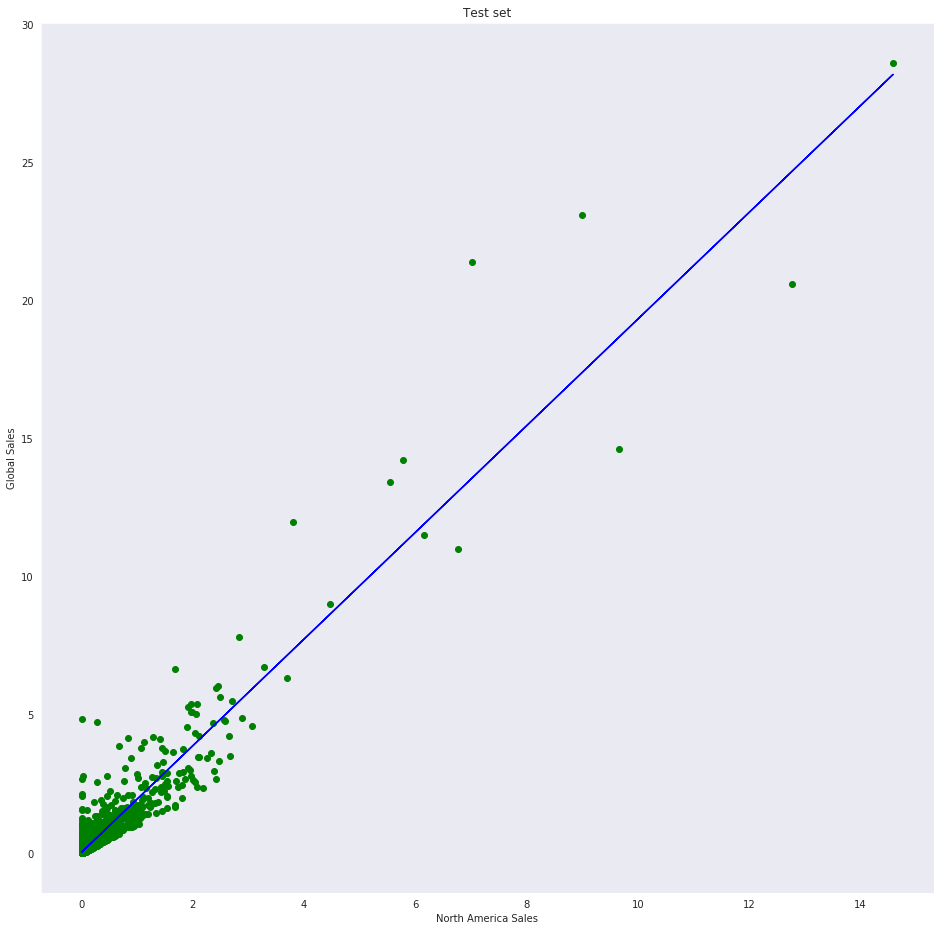

In [23]:
plt.figure(figsize = (16,16))
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred_test, color='blue')
plt.title('Test set')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

In [24]:
print("Training score: {:.2f}".format(regressor.score(X_train,y_train)))
print("Test score: {:.2f}".format(regressor.score(X_test,y_test)))

Training score: 0.88
Test score: 0.90


Линейный регрессор показал даволько хороший результат. Попробуем что то по интереснее, к примеру дерево решений.

## Дерево решений

In [26]:
from sklearn.tree import DecisionTreeRegressor

X = X.reshape((X.shape[0],1))
y = y.reshape((y.shape[0],1))


Dregressor = DecisionTreeRegressor(random_state=0)
Dregressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [27]:
y_pred = Dregressor.predict(X)

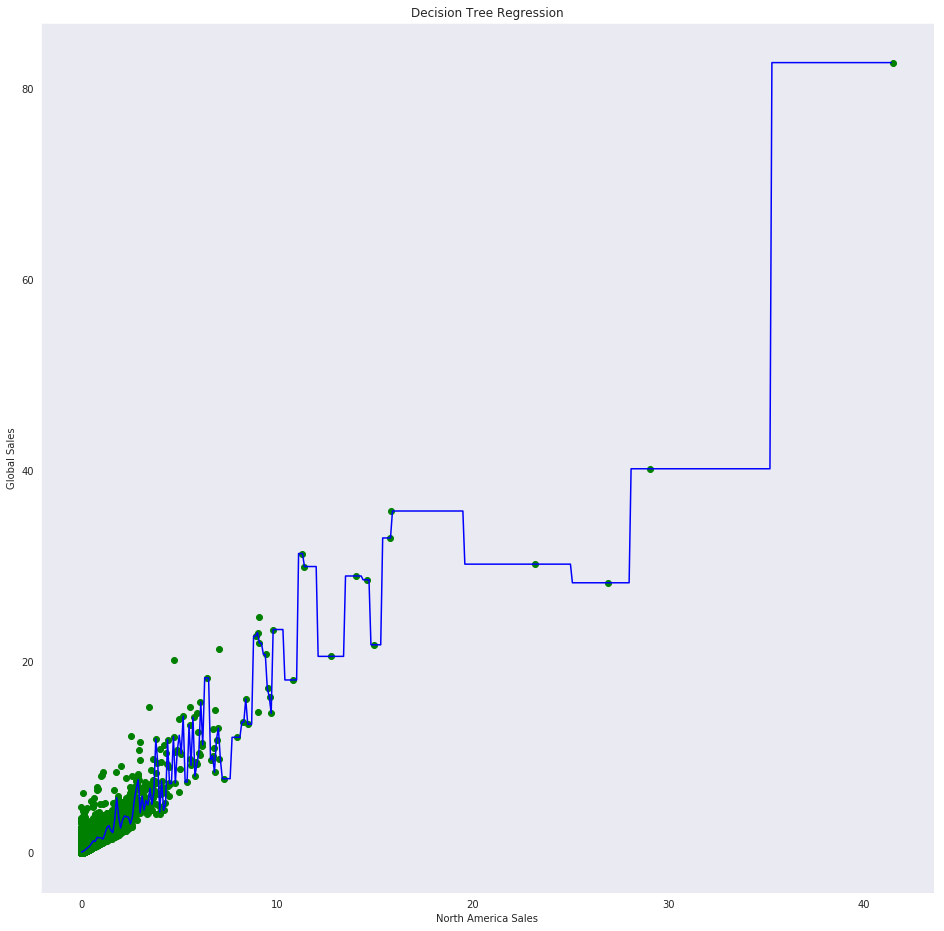

In [28]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (16,16))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, Dregressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(Dregressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# дерево сохранено в файл dec_tree_games_max_depth.png
graph.write_png("dec_tree_games_max_depth.png")
Image(graph.create_png())

In [30]:
print("Decision tree score (max depth): {:.2f}".format(Dregressor.score(X,y)))

Decision tree score (max depth): 0.95


Дерево решений имеет лучший результат по сравнению с линейной регрессией. Однако оно получилось крайне широким, попробуем для лучшей визуализации уменьшить его глубину до 5 и посмотрим как изменится точность модели.

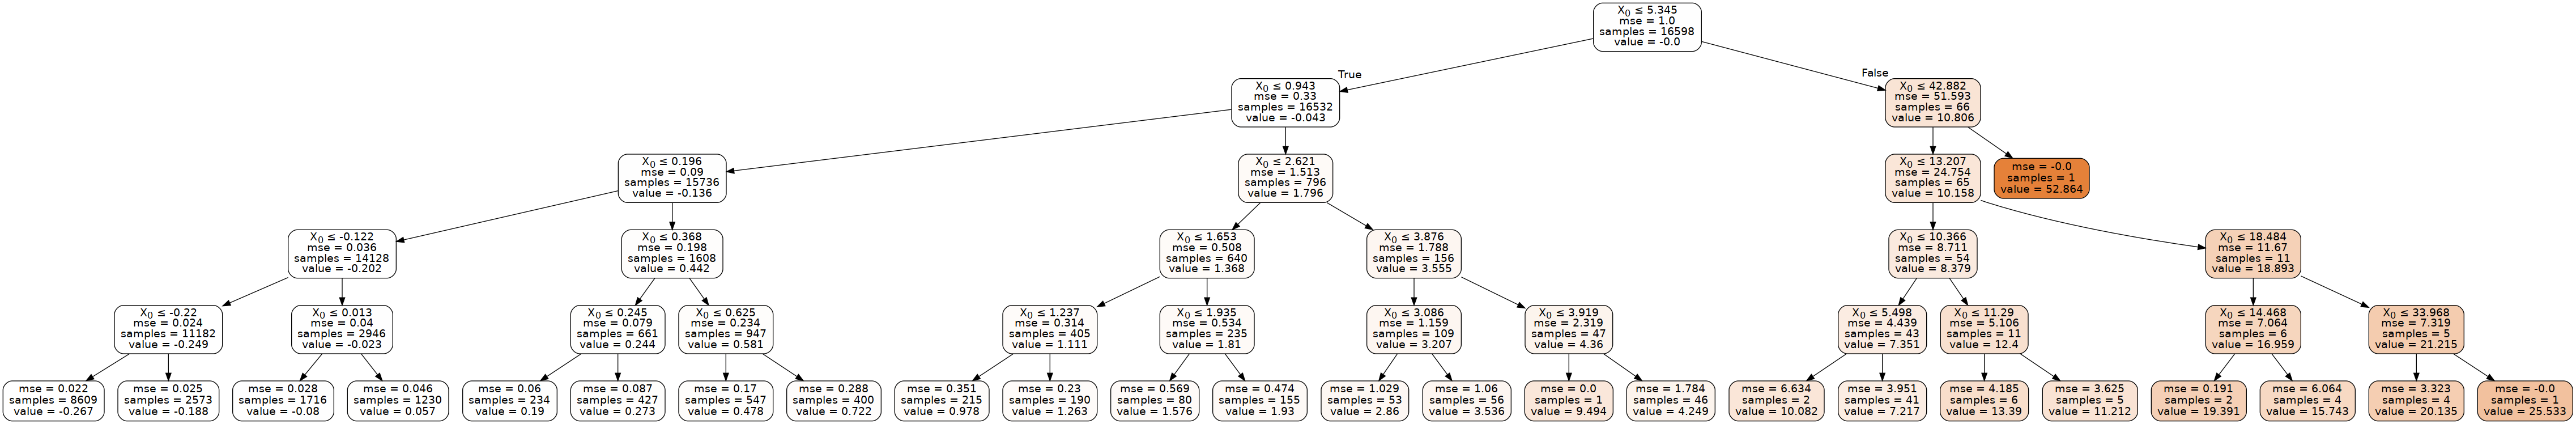

In [52]:
Dregressor = DecisionTreeRegressor(random_state=0, max_depth=5)
Dregressor.fit(X,y)
dot_data = StringIO()

export_graphviz(Dregressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# дерево сохранено в файл dec_tree_games_depth_5.png
graph.write_png("dec_tree_games_depth_5.png")
Image(graph.create_png())

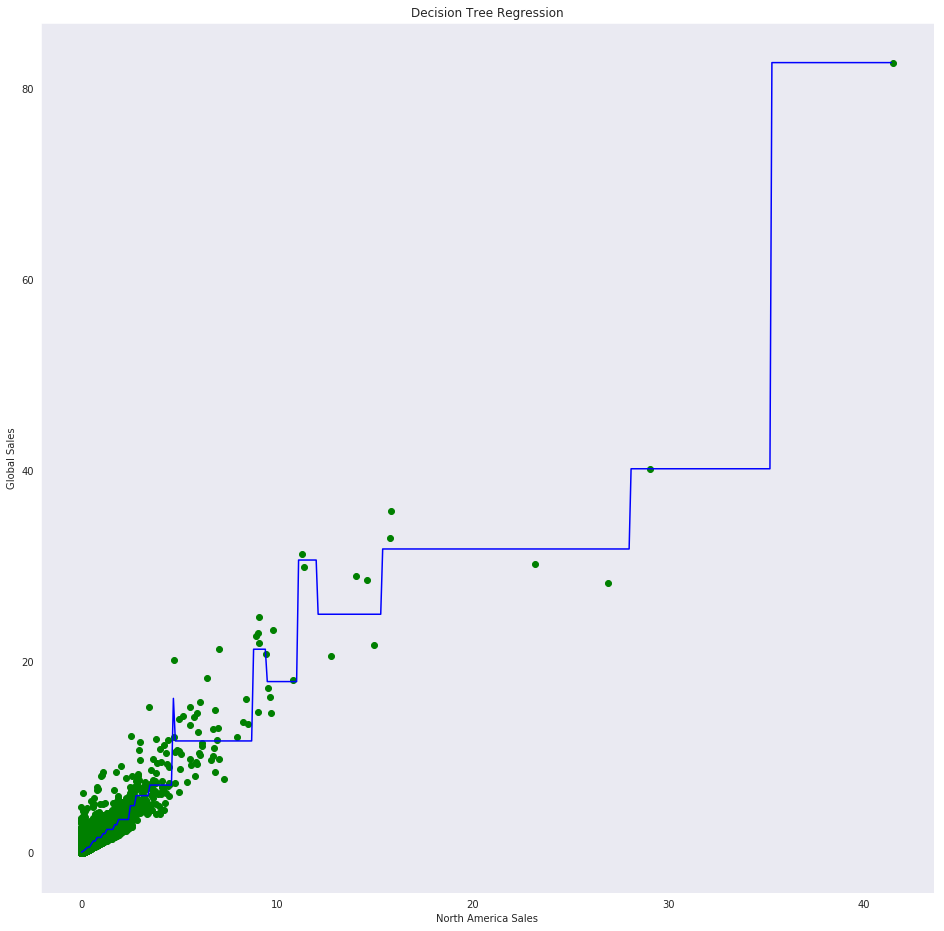

In [32]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (16,16))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, Dregressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

In [53]:
print("Decision tree score (depth = 5): {:.2f}".format(Dregressor.score(X,y)))

Decision tree score (depth = 5): 0.92


Как можно заметить точность уменьшилась на 0.03%. За то дерево сильно уменьшилось, что может помочь не переобучиться и ускорить работу модели.

## Случайный лес

In [34]:
from sklearn.ensemble import RandomForestRegressor
Rregressor = RandomForestRegressor(n_estimators=300, random_state=0)
Rregressor.fit(X,y)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
y_pred = Rregressor.predict(X)

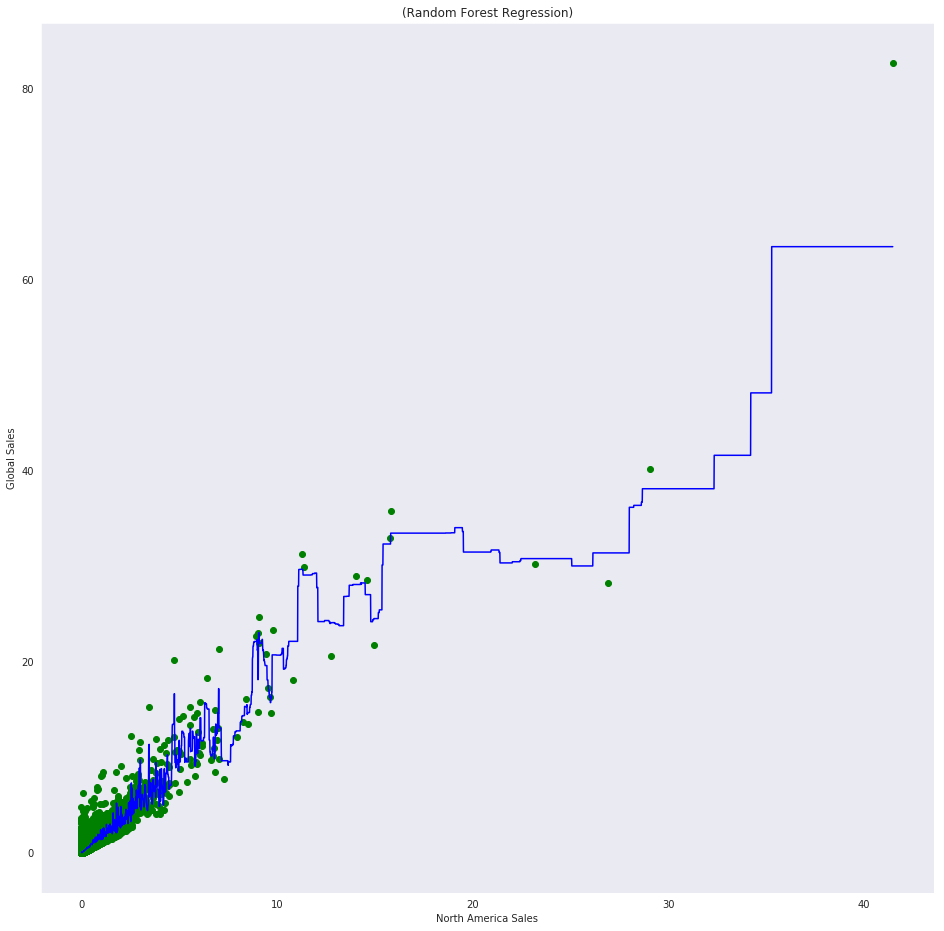

In [36]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (16,16))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, Rregressor.predict(X_grid), color = 'blue')
plt.title('(Random Forest Regression)')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

In [38]:
print("Random Forest score: {:.2f}".format(Rregressor.score(X,y)))

Random Forest score: 0.93


Пока дерево решений все же показывает лучший результат.

## Метод опорных векторов

Скорее всего метод покажет себя очень плохо, так как не очень подходит для наших целей.

In [39]:
from sklearn.svm import SVR
SVRregressor = SVR(kernel = 'rbf')
SVRregressor.fit(X,y)

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

Для нормальной работы алгоритма нужно произвести масштабирование фич.

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [42]:
y_pred = sc_y.inverse_transform(SVRregressor.predict(sc_X.transform(X)))

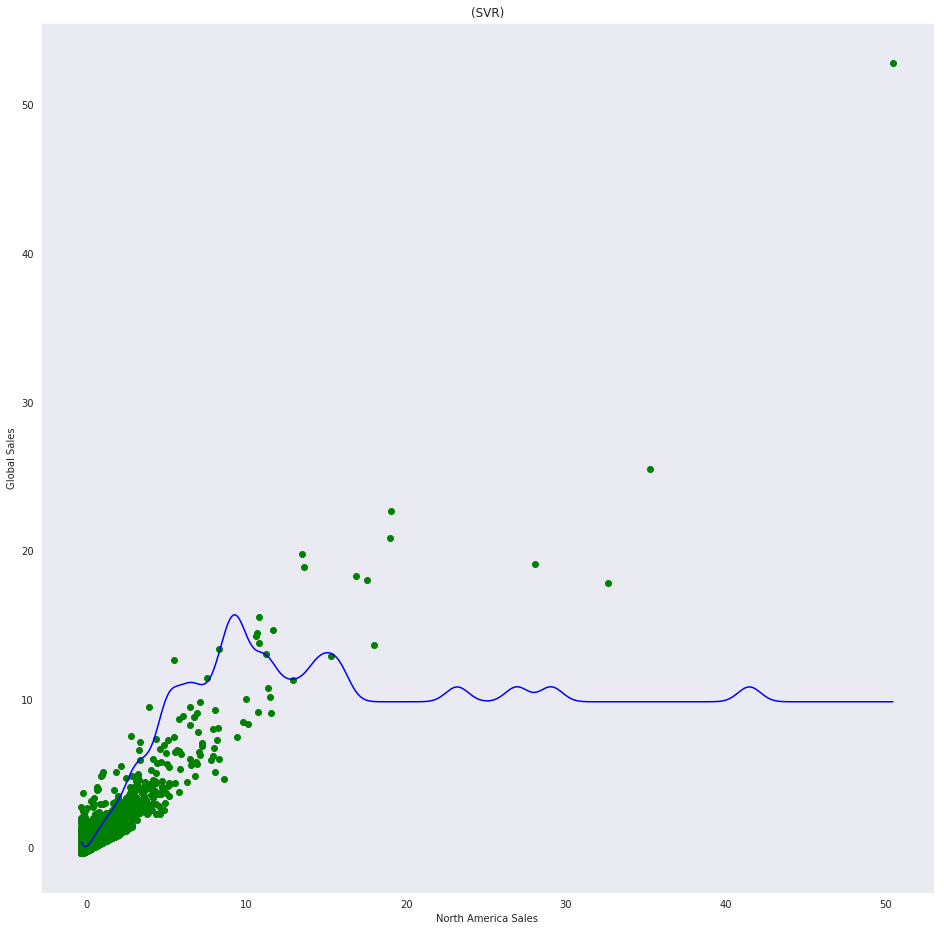

In [66]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (16,16))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, SVRregressor.predict(X_grid), color = 'blue')
plt.title('(SVR)')
plt.xlabel('North America Sales')
plt.ylabel('Global Sales')
plt.show()

In [50]:
print("SVR score: {:.2f}".format(SVRregressor.score(X,y)))

SVR score: 0.31


Как и ожидалось, метод опорных векторов плохо себя показал.

**Вывод:** лучшей моделью для предсказания продаж оказалось дерево решений с неогранниченной глубиной, также неплохо себя показал случайный лес. Основываясь на продажах в Северной Америке мы можем с 95% вероятностью предсказать глобальные продажи.